# 1.	Research questions, select analyses, import data

### a. Define research questions

In [1]:
#RQ #1: How do customers cluster when we consider the recency, frequency, and monetary value of their purchase history?
#RQ #2: What are the characteristics of each cluster?

### b.	Select analyses to answer research questions

In [2]:
#RQ #1: K-Means Clustering
#RQ #2: Segment Features Table

### c.	Import libraries

In [3]:
#Import Usual Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly as py
%matplotlib inline
import datetime as dt
import os

#Import Libararies for K-Means Clustering
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### d. Import data

In [4]:
#Import the data from online
#Get data frame head
import requests
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
r = requests.get(url)
open('Online_Retail.xls','wb').write(r.content)
df = pd.read_excel('Online_Retail.xls')
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
#Get the number of rows and columns of the data
df.shape

(541909, 8)

### e. Select a sample

In [6]:
#Take a random sample of 10% of the data to use for faster initial analysis.
df = df.sample(frac=0.1,random_state=101)
#See how many rows of data you have now
print(len(df))

54191


# 2.	Clean Columns

### a. Remove unnecessary columns

In [7]:
#Get a list of the columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
#Drop the columns that you don't need in the analysis.
df=df.drop('Description', axis=1)
#Check the result
df.head(2)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
204327,554651,22796,4,2011-05-25 12:55:00,9.95,12779.0,Poland
279938,561369,23292,1,2011-07-26 16:22:00,2.46,NaN,United Kingdom


### b. Rename columns as desired

In [9]:
# Rename columns for clarity and make the changes permenant
df.rename(columns = {'InvoiceDate': 'Date', 'UnitPrice': 'Price'}, inplace=True)
df.head(2)

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
204327,554651,22796,4,2011-05-25 12:55:00,9.95,12779.0,Poland
279938,561369,23292,1,2011-07-26 16:22:00,2.46,NaN,United Kingdom


### c. Change date format of a column

In [10]:
# Convert the Date column to show the date only and omit the time.
from datetime import datetime
df["Date"] = df["Date"].dt.date
df.head(2)

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
204327,554651,22796,4,2011-05-25,9.95,12779.0,Poland
279938,561369,23292,1,2011-07-26,2.46,NaN,United Kingdom


### d. Check for typos in a column with text

In [11]:
#List the values of a categorical variable column.
#Sort alphabetically
#Check for any misspellings causing duplicate category names.
df['Country'].value_counts().sort_index(ascending=True)

Australia                 121
Austria                    44
Bahrain                     3
Belgium                   204
Canada                     10
Channel Islands            76
Cyprus                     72
Czech Republic              4
Denmark                    31
EIRE                      817
European Community          2
Finland                    74
France                    862
Germany                   997
Greece                     16
Hong Kong                  34
Iceland                    14
Israel                     32
Italy                      80
Japan                      40
Lebanon                     5
Lithuania                   2
Malta                      19
Netherlands               227
Norway                     98
Poland                     34
Portugal                  153
RSA                         2
Saudi Arabia                1
Singapore                  23
Spain                     269
Sweden                     51
Switzerland               199
USA       

In [12]:
#Replace any misspelled values with the correct spellings and check the new values. Also prevent a warning from annoying you.
pd.options.mode.chained_assignment = None
df['Country'].replace(['Czech Republic'],'Czechia',inplace=True)
df['Country'].value_counts()

United Kingdom          49508
Germany                   997
France                    862
EIRE                      817
Spain                     269
Netherlands               227
Belgium                   204
Switzerland               199
Portugal                  153
Australia                 121
Norway                     98
Italy                      80
Channel Islands            76
Finland                    74
Cyprus                     72
Sweden                     51
Austria                    44
Japan                      40
Unspecified                36
Poland                     34
Hong Kong                  34
Israel                     32
Denmark                    31
USA                        29
Singapore                  23
Malta                      19
Greece                     16
Iceland                    14
Canada                     10
Lebanon                     5
Czechia                     4
Bahrain                     3
United Arab Emirates        2
RSA       

### e. Remove/replace null data in a column

In [13]:
#Get the total number of null values in each column.
df.isnull().sum()

InvoiceNo         0
StockCode         0
Quantity          0
Date              0
Price             0
CustomerID    13393
Country           0
dtype: int64

In [14]:
#Calculate the percentage of null values in each column, list descending, and format the result to two decimal places.
(df.isnull().sum()/len(df)).sort_values(ascending=False).apply('{:,.2%}'.format)

CustomerID    24.71%
InvoiceNo      0.00%
StockCode      0.00%
Quantity       0.00%
Date           0.00%
Price          0.00%
Country        0.00%
dtype: object

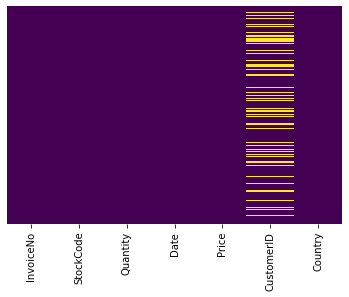

In [15]:
#See where we are missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [16]:
#Decide to remove or replace null values (replace through imputation for each column)
#We decide to remove all rows with null values. 
#Remove nulls then check the result.
df.dropna(inplace=True)
df.isnull().sum()

InvoiceNo     0
StockCode     0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64

In [17]:
#See the number of rows and columns we have now.
df.shape

(40798, 7)

### b. Reformat column data types as needed

In [18]:
#Check the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40798 entries, 204327 to 537474
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   InvoiceNo   40798 non-null  object 
 1   StockCode   40798 non-null  object 
 2   Quantity    40798 non-null  int64  
 3   Date        40798 non-null  object 
 4   Price       40798 non-null  float64
 5   CustomerID  40798 non-null  float64
 6   Country     40798 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 2.5+ MB


In [19]:
#Change a column's data type and check to see that it changed.
df = df.astype({"CustomerID": 'int64', "Date": 'datetime64[ns]'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40798 entries, 204327 to 537474
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   InvoiceNo   40798 non-null  object        
 1   StockCode   40798 non-null  object        
 2   Quantity    40798 non-null  int64         
 3   Date        40798 non-null  datetime64[ns]
 4   Price       40798 non-null  float64       
 5   CustomerID  40798 non-null  int64         
 6   Country     40798 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 2.5+ MB


# 3. Clean Rows

### a. Remove unnecessary rows for categorical variables

In [20]:
#See the unique values in a column
df['Country'].unique()

array(['Poland', 'United Kingdom', 'France', 'Germany', 'EIRE', 'Spain',
       'Belgium', 'Sweden', 'Cyprus', 'Singapore', 'Australia',
       'Channel Islands', 'Portugal', 'Netherlands', 'Norway', 'Czechia',
       'Austria', 'Finland', 'Switzerland', 'Denmark', 'Italy', 'Japan',
       'Israel', 'Unspecified', 'Greece', 'USA', 'Malta', 'Iceland',
       'Canada', 'Lebanon', 'United Arab Emirates', 'Bahrain', 'RSA',
       'European Community', 'Lithuania', 'Saudi Arabia'], dtype=object)

In [21]:
#Remove rows for the value of a category that we do not need. 
#Keep only the rows in the data that do not include a certain categorical value in a column.
#Check the result
df=df[~df['Country'].isin(['Unspecified'])]
df['Country'].unique()

array(['Poland', 'United Kingdom', 'France', 'Germany', 'EIRE', 'Spain',
       'Belgium', 'Sweden', 'Cyprus', 'Singapore', 'Australia',
       'Channel Islands', 'Portugal', 'Netherlands', 'Norway', 'Czechia',
       'Austria', 'Finland', 'Switzerland', 'Denmark', 'Italy', 'Japan',
       'Israel', 'Greece', 'USA', 'Malta', 'Iceland', 'Canada', 'Lebanon',
       'United Arab Emirates', 'Bahrain', 'RSA', 'European Community',
       'Lithuania', 'Saudi Arabia'], dtype=object)

### c. Remove unnecessary rows of numerical data

In [22]:
#Remove rows of items that were returned that have a 'C' in the stockcode.
#See how many rows are left.
df = df[~df['InvoiceNo'].str.contains('C', na=False)]
df.shape

(39859, 7)

In [23]:
#Remove negative prices and negative quantities. We'll keep their initial orders.
#Keep only the rows that are greater than zero. 
#Check the resulting min and max.
df = df[df['Price'] > 0]
df = df[df['Quantity'] > 0]
df.describe()

,Quantity,Price,CustomerID
count,39856.000000,39856.000000,39856.000000
mean,14.402524,3.252857,15297.294987
std,374.159523,27.347961,1718.602551
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13956.000000
50%,5.000000,1.950000,15164.000000
75%,12.000000,3.750000,16809.000000
max,74215.000000,4161.060000,18287.000000


### d. Remove rows outside of target timeframe

In [24]:
#Get the range of dates in the date column.
date_range = str(df['Date'].min()) + ' to ' + str(df['Date'].max())
date_range

'2010-12-01 00:00:00 to 2011-12-09 00:00:00'

In [25]:
#Remove rows with dates that are before or after the dates we want to include by only specifying the dates we want to include.
df=df.loc[(df['Date'] >= '2010-12-01 00:00:00') & (df['Date'] < '2011-12-01 00:00:00')]
df.shape

(38114, 7)

### e. Remove duplicate rows

In [26]:
#See how many rows are duplicates of another row
df.duplicated(subset=None, keep='first').sum()

49

In [27]:
#See a list of all duplicate rows (including the ones you want to keep) and sort them ascending using the CustomerID column and then the date column
df[df.duplicated(subset=None, keep=False)].sort_values(['CustomerID', 'Date'])

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
216822,555854,22361,1,2011-06-07,2.95,12748,United Kingdom
216823,555854,22361,1,2011-06-07,2.95,12748,United Kingdom
420366,572889,22621,1,2011-10-26,1.65,12748,United Kingdom
420362,572889,22621,1,2011-10-26,1.65,12748,United Kingdom
500309,578757,23126,1,2011-11-25,4.95,12748,United Kingdom
...,...,...,...,...,...,...,...
73915,542393,21169,1,2011-01-27,1.69,18125,United Kingdom
503418,578926,22866,1,2011-11-27,2.10,18156,United Kingdom
503437,578926,22866,1,2011-11-27,2.10,18156,United Kingdom
59902,541414,21756,1,2011-01-17,5.95,18212,United Kingdom


In [28]:
#Remove duplicate rows and see how many rows you now have.
df.drop_duplicates(inplace=True)
df.shape

(38065, 7)

### f. Remove rows with outliers as appropriate

<AxesSubplot:ylabel='Quantity'>

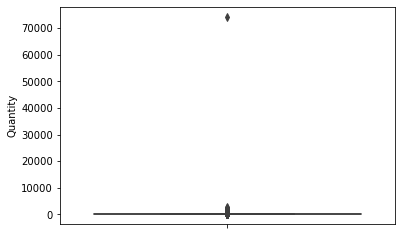

In [29]:
#Look at a boxplot of numerical columns to identify possible outliers
sns.boxplot(y='Quantity', data=df)

In [30]:
#Sort the values of the column descending to identify possible outliers
df.sort_values('Quantity', ascending=False).head(10)

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
61619,541431,23166,74215,2011-01-18,1.04,12346,United Kingdom
201149,554272,21977,2700,2011-05-23,0.42,12901,United Kingdom
421601,573003,23084,2400,2011-10-27,2.08,14646,Netherlands
32671,539101,22693,2400,2010-12-16,0.94,16029,United Kingdom
348317,567423,23288,1944,2011-09-20,1.08,17450,United Kingdom
63444,541570,21212,1440,2011-01-19,0.42,14646,Netherlands
185919,552833,23167,1350,2011-05-11,0.69,18133,United Kingdom
125281,547037,22616,1296,2011-03-20,0.25,14101,United Kingdom
86505,543549,21985,1296,2011-02-10,0.22,17940,United Kingdom
221744,556267,15034,1200,2011-06-09,0.07,13694,United Kingdom


In [31]:
#Remove an outlier row that may be a mistake and then recheck the data
df.drop(labels=61619, axis=0, inplace=True)
df.sort_values('Quantity', ascending=False).head(5)

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
201149,554272,21977,2700,2011-05-23,0.42,12901,United Kingdom
32671,539101,22693,2400,2010-12-16,0.94,16029,United Kingdom
421601,573003,23084,2400,2011-10-27,2.08,14646,Netherlands
348317,567423,23288,1944,2011-09-20,1.08,17450,United Kingdom
63444,541570,21212,1440,2011-01-19,0.42,14646,Netherlands


<AxesSubplot:ylabel='Price'>

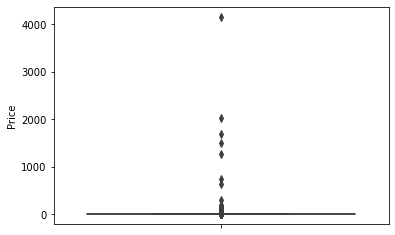

In [32]:
#Look at a boxplot of another numerical column to identify possible outliers
sns.boxplot(y='Price', data=df)

In [33]:
#Sort the values of the column descending to identify possible outliers
df.sort_values('Price', ascending=False).head(10)

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
422376,573080,M,1,2011-10-27,4161.06,12536,France
343000,566927,M,1,2011-09-15,2033.10,17846,United Kingdom
117054,546328,M,1,2011-03-11,1687.17,14911,EIRE
467436,576339,DOT,1,2011-11-14,1500.36,14096,United Kingdom
494728,578270,DOT,1,2011-11-23,1270.06,14096,United Kingdom
401766,571441,DOT,1,2011-10-17,743.62,14096,United Kingdom
222682,556446,22502,1,2011-06-10,649.50,15098,United Kingdom
485574,577609,POST,1,2011-11-21,300.00,12349,Italy
114795,546088,22826,1,2011-03-09,195.00,12881,United Kingdom
25168,538354,22826,2,2010-12-10,175.00,16873,United Kingdom


In [34]:
#Remove an outlier row that may be a mistake
#Recheck the data
df.drop(labels=422376, axis=0, inplace=True)
df.sort_values('Price', ascending=False).head(5)

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
343000,566927,M,1,2011-09-15,2033.10,17846,United Kingdom
117054,546328,M,1,2011-03-11,1687.17,14911,EIRE
467436,576339,DOT,1,2011-11-14,1500.36,14096,United Kingdom
494728,578270,DOT,1,2011-11-23,1270.06,14096,United Kingdom
401766,571441,DOT,1,2011-10-17,743.62,14096,United Kingdom


In [35]:
#Check how many rows you have now
df.shape

(38063, 7)

### g. Remove extra spaces in a column with text

In [36]:
#Remove leading and trailing white spaces from a column with strings
df['Country'] = df['Country'].str.strip()
df

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
204327,554651,22796,4,2011-05-25,9.95,12779,Poland
268069,560385,84673A,1,2011-07-18,0.65,14583,United Kingdom
374701,569401,23293,8,2011-10-04,0.83,15111,United Kingdom
417351,572653,20973,10,2011-10-25,0.65,15861,United Kingdom
118152,546423,21773,1,2011-03-13,1.25,14502,United Kingdom
...,...,...,...,...,...,...,...
479108,577141,23382,4,2011-11-18,3.75,13269,United Kingdom
216991,555865,23043,2,2011-06-07,6.25,14530,United Kingdom
421075,572918,22983,24,2011-10-26,0.42,14379,United Kingdom
97400,544607,22978,12,2011-02-22,3.75,13862,United Kingdom


# 4. Feature Engineering 

### a. Combine categories within a categorical variable

In [37]:
#List columns that are categorical (not continuous)
df.select_dtypes(['object']).columns

Index(['InvoiceNo', 'StockCode', 'Country'], dtype='object')

In [38]:
#For each relevant categorical variable column, look at the counts for each value to see if an infrequent category needs to be dropped or combined with another category.
#See what values are in the column and count how many are in each category.
df['Country'].value_counts()

United Kingdom          33829
Germany                   916
France                    802
EIRE                      704
Spain                     259
Netherlands               214
Belgium                   191
Switzerland               182
Portugal                  134
Australia                 117
Norway                     95
Italy                      77
Channel Islands            74
Cyprus                     72
Finland                    69
Sweden                     50
Austria                    42
Japan                      35
Poland                     34
Denmark                    30
Israel                     29
Singapore                  23
Malta                      17
USA                        14
Greece                     12
Iceland                    12
Canada                     10
Lebanon                     5
Czechia                     4
United Arab Emirates        2
Bahrain                     2
RSA                         2
European Community          2
Lithuania 

In [39]:
#Get a list of the categories in the categorical variable to get ready to copy and paste what you want to combine.
df['Country'].unique()

array(['Poland', 'United Kingdom', 'France', 'Germany', 'EIRE', 'Spain',
       'Belgium', 'Sweden', 'Cyprus', 'Singapore', 'Australia',
       'Channel Islands', 'Portugal', 'Netherlands', 'Norway', 'Czechia',
       'Austria', 'Finland', 'Switzerland', 'Denmark', 'Italy', 'Japan',
       'Israel', 'Greece', 'Malta', 'Iceland', 'Canada', 'Lebanon', 'USA',
       'United Arab Emirates', 'Bahrain', 'RSA', 'European Community',
       'Lithuania', 'Saudi Arabia'], dtype=object)

In [40]:
#Combine a few of the smaller categories into an 'Other' category and make the change permenant.
#Then look at the new value counts.
df['Country']=df['Country'].replace(['Lebanon', 'Czechia', 'Saudi Arabia','United Arab Emirates', 'Bahrain', 'RSA', 'European Community', 'Lithuania'], 'Other')
df['Country'].value_counts()

United Kingdom     33829
Germany              916
France               802
EIRE                 704
Spain                259
Netherlands          214
Belgium              191
Switzerland          182
Portugal             134
Australia            117
Norway                95
Italy                 77
Channel Islands       74
Cyprus                72
Finland               69
Sweden                50
Austria               42
Japan                 35
Poland                34
Denmark               30
Israel                29
Singapore             23
Other                 20
Malta                 17
USA                   14
Greece                12
Iceland               12
Canada                10
Name: Country, dtype: int64

### b. Create a new date column using datetime data

In [41]:
#Make new columns for Year and Month using a date-time column
df['Year']=df['Date'].apply(lambda date : date.year)
df['Month']=df['Date'].apply(lambda date : date.month)
df.head(2)

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country,Year,Month
204327,554651,22796,4,2011-05-25,9.95,12779,Poland,2011,5
268069,560385,84673A,1,2011-07-18,0.65,14583,United Kingdom,2011,7


In [42]:
#Look at the value counts for the new 'Year' column
df['Year'].value_counts()

2011    35423
2010     2640
Name: Year, dtype: int64

### c. Create a new column of data using numerical data

In [43]:
# Create a TotalSum colummn by multiplying two columns to see total spent for that person for that transaction
df["TotalSum"] = df["Quantity"] * df["Price"]
df.head(2)

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country,Year,Month,TotalSum
204327,554651,22796,4,2011-05-25,9.95,12779,Poland,2011,5,39.80
268069,560385,84673A,1,2011-07-18,0.65,14583,United Kingdom,2011,7,0.65


### d. Reorder Columns

In [44]:
#Get the column names before you reorder them
df.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'Date', 'Price', 'CustomerID',
       'Country', 'Year', 'Month', 'TotalSum'],
      dtype='object')

In [45]:
#Reorder columns so that they look the way we like.
df=df[['InvoiceNo', 'StockCode', 'Date', 'Year', 'Month', 'Quantity','Price', 'TotalSum','CustomerID','Country']]
df.head(2)

,InvoiceNo,StockCode,Date,Year,Month,Quantity,Price,TotalSum,CustomerID,Country
204327,554651,22796,2011-05-25,2011,5,4,9.95,39.80,12779,Poland
268069,560385,84673A,2011-07-18,2011,7,1,0.65,0.65,14583,United Kingdom


### d. Pivot to create a new data frame

In [46]:
#Find most recent date in the transactions to use as a reference point. We'll call it refdate.
#We'll add one day to the newest date, so the most recent date in our data can get included in the analysis.
refdate = max(df.Date) + dt.timedelta(days=1) 
refdate

Timestamp('2011-12-01 00:00:00')

In [47]:
#Aggregate Recency, Frequency, and Monetary Value Data by each customer and create a new data frame for it. 
    #Recency is number of days between last purchase and most recent date in the data.
    #Frequency is the number of times that customer has made a purchase.
    #Monetary value is the total amount of money that customer has spent so far.

#Group the rows for each customer.
#Get each customer's most recent transaction date and subtract it from the reference date.
#Count the number of transactions for each customer.
#Sum the total dollars spent by each customer.
#Rename the columns and look at the new data frame
df2 = df.groupby(['CustomerID']).agg({'Date': lambda x: (refdate - x.max()).days,'InvoiceNo': 'count', 'TotalSum': 'sum'})
df2.rename(columns = {'Date': 'Recency (Days)', 'InvoiceNo': 'Frequency (Total Purchases)', 'TotalSum': 'Monetary Value'}, inplace=True)
df2.head()

,Recency (Days),Frequency (Total Purchases),Monetary Value
CustomerID,,,
12347,31,12,292.98
12348,310,1,40.00
12349,10,11,528.27
12350,302,1,15.00
12352,64,5,108.40


In [48]:
#Get info on the new dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3724 entries, 12347 to 18287
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Recency (Days)               3724 non-null   int64  
 1   Frequency (Total Purchases)  3724 non-null   int64  
 2   Monetary Value               3724 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 116.4 KB


# 5a. Exploratory Data Analysis of 1st Dataframe: Univariate 

### a. Look at the head of the first data frame

In [49]:
df.head()

,InvoiceNo,StockCode,Date,Year,Month,Quantity,Price,TotalSum,CustomerID,Country
204327,554651,22796,2011-05-25,2011,5,4,9.95,39.80,12779,Poland
268069,560385,84673A,2011-07-18,2011,7,1,0.65,0.65,14583,United Kingdom
374701,569401,23293,2011-10-04,2011,10,8,0.83,6.64,15111,United Kingdom
417351,572653,20973,2011-10-25,2011,10,10,0.65,6.50,15861,United Kingdom
118152,546423,21773,2011-03-13,2011,3,1,1.25,1.25,14502,United Kingdom


### b. Categorical variables

In [50]:
#Get info on columns of categorical variables and their values.
df.describe(include='object').transpose()

,count,unique,top,freq
InvoiceNo,38063,12329,576339,59
StockCode,38063,2961,85123A,186
Country,38063,28,United Kingdom,33829


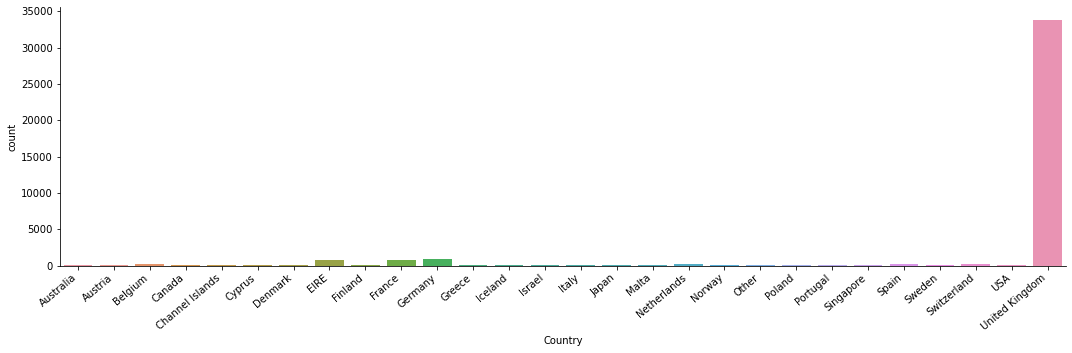

In [51]:
#Look at counts in bar charts
#Make a countplot for a categorical variable column and list each bar in alphabetical order
#Put the items on the x axis in alphabetical order.
plt.figure(figsize=(15,5))
country_order=sorted(df['Country'].unique())
sns.countplot(x='Country', data=df, order=country_order).set_xticklabels(sns.countplot(x='Country', data=df, order=country_order).get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
sns.despine()

### c. Numeric variables

In [52]:
#Get descriptive statistics for each column of continuous data
df.describe().transpose().applymap('{:,.2f}'.format)

,count,mean,std,min,25%,50%,75%,max
Year,"38,063.00","2,010.93",0.25,"2,010.00","2,011.00","2,011.00","2,011.00","2,011.00"
Month,"38,063.00",7.40,3.37,1.00,5.00,8.00,10.00,12.00
Quantity,"38,063.00",12.58,42.95,1.00,2.00,5.00,12.00,"2,700.00"
Price,"38,063.00",3.17,18.12,0.00,1.25,1.95,3.75,"2,033.10"
TotalSum,"38,063.00",21.44,66.27,0.00,4.95,11.85,19.80,"4,992.00"
CustomerID,"38,063.00","15,293.72","1,717.54","12,347.00","13,954.50","15,167.00","16,800.00","18,287.00"


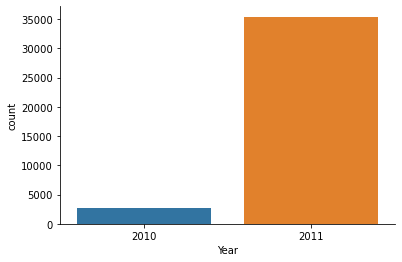

In [53]:
# Make countplots for datetime data
sns.countplot(x='Year', data=df)
sns.despine()

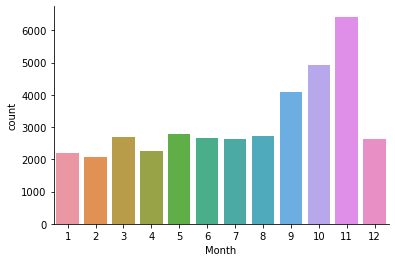

In [54]:
# Make countplots for datetime data
sns.countplot(x='Month', data=df)
sns.despine()

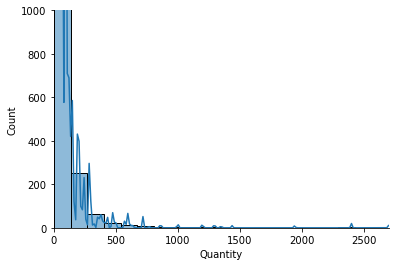

In [55]:
# Look at distributions in histograms
g1=sns.histplot(df['Quantity'], kde=True, bins=20) 
g1.set_xlim([0,max(df['Quantity'])])
g1.set_ylim([0,1000])
sns.despine()

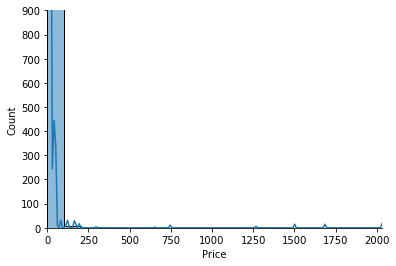

In [56]:
# Look at distributions in histograms
g1=sns.histplot(df['Price'], kde=True, bins=20) 
g1.set_xlim([0,max(df['Price'])])
g1.set_ylim([0,900])
sns.despine()

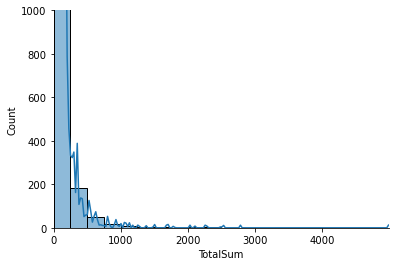

In [57]:
# Look at distributions in histograms
g1=sns.histplot(df['TotalSum'], kde=True, bins=20) 
g1.set_xlim([0,max(df['TotalSum'])])
g1.set_ylim([0,1000])
sns.despine()

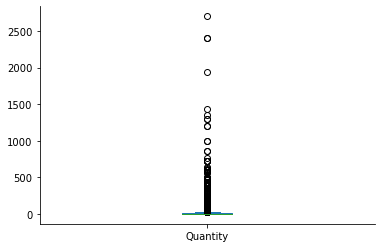

In [58]:
#Look at distributions in boxplots
df['Quantity'].plot.box()
sns.despine()

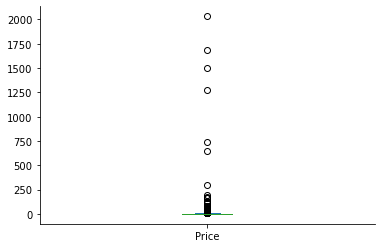

In [59]:
#Look at distributions in boxplots
df['Price'].plot.box()
sns.despine()

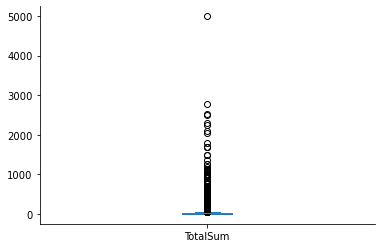

In [60]:
#Look at distributions in boxplots
df['TotalSum'].plot.box()
sns.despine()

# 5b. Exploratory Data Analysis of 1st Data Frame: Multivariate 

### a. Look at variables in a pairplot

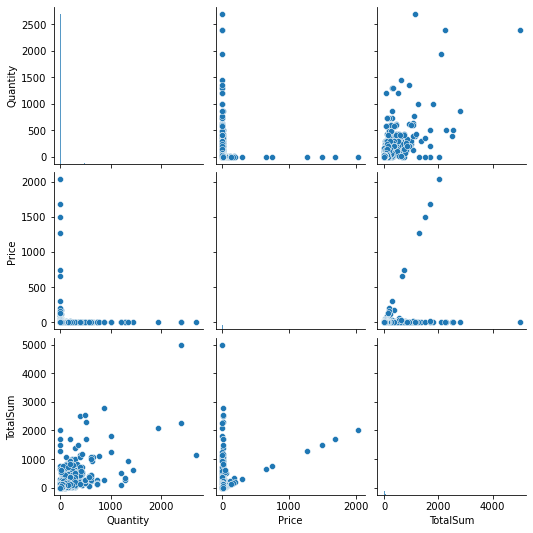

In [61]:
#Do a pairplot for interesting variables
sns.pairplot(df, vars = df.columns[5:8], palette='Dark2')

### b. Charts of numeric variables by categorical variables.

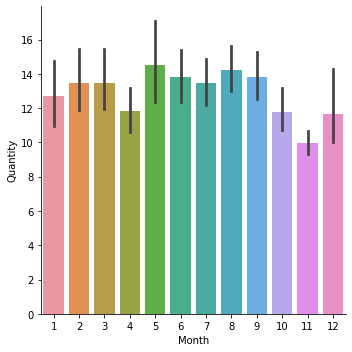

In [62]:
sns.catplot(x='Month', y='Quantity', data=df, kind='bar')

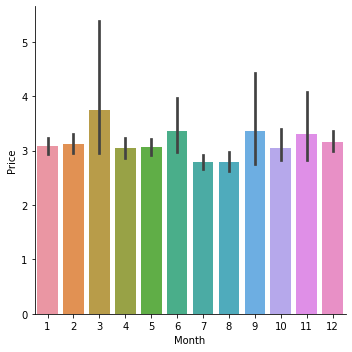

In [63]:
sns.catplot(x='Month', y='Price', data=df, kind='bar')

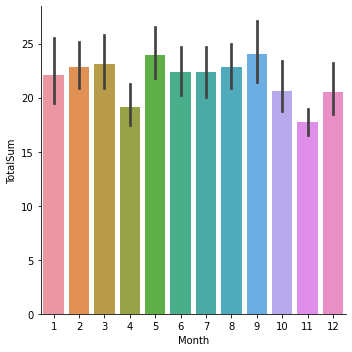

In [64]:
sns.catplot(x='Month', y='TotalSum', data=df, kind='bar')

### c. Charts of time series trends

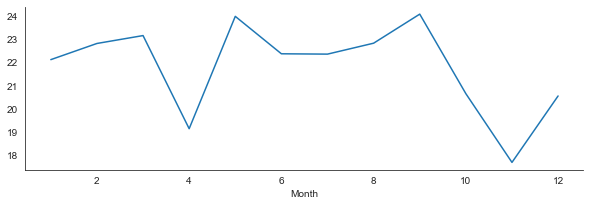

In [65]:
#Look at average total spent per customer per month
sns.set_style('white')
plt.figure(figsize=(10,3))
df.groupby('Month').mean()['TotalSum'].plot()
sns.despine()

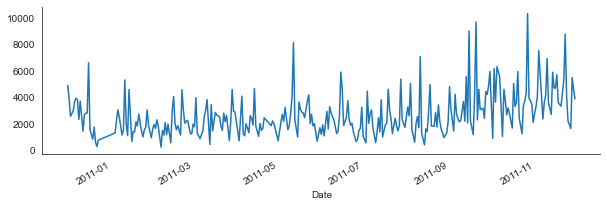

In [66]:
#Total revenue per day
sns.set_style('white')
plt.figure(figsize=(10,3))
df.groupby('Date').sum()['TotalSum'].plot()
sns.despine()

### e. Correlations matrix using numeric variables

<AxesSubplot:>

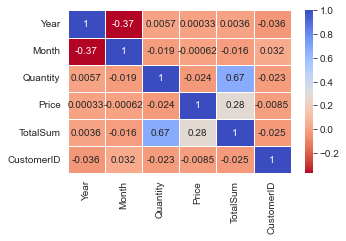

In [67]:
#Look at correlations between variables in a heatmap
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(), cmap='coolwarm_r', linecolor='white', linewidths=1, annot=True)  

### f. View 3 variables together

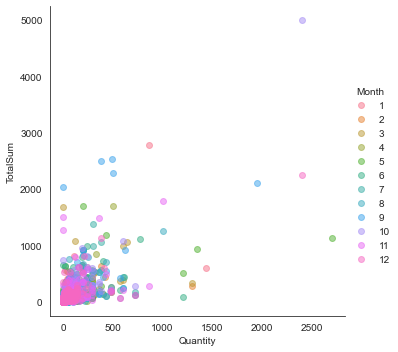

In [68]:
sns.lmplot(x='Quantity', y='TotalSum', data=df, hue='Month', fit_reg=False, scatter_kws={'alpha':0.5});

# 6a. Exploratory Data Analysis of 2nd Dataframe: Univariate 

### a. Look at the head of the data frame

In [69]:
df2.head()

,Recency (Days),Frequency (Total Purchases),Monetary Value
CustomerID,,,
12347,31,12,292.98
12348,310,1,40.00
12349,10,11,528.27
12350,302,1,15.00
12352,64,5,108.40


### b. Categorical variables

In [70]:
#None for this dataframe

### c. Numeric variables

In [71]:
#Get descriptive statistics for each column of continuous data
df2.describe().transpose().applymap('{:,.2f}'.format)

,count,mean,std,min,25%,50%,75%,max
Recency (Days),"3,724.00",95.40,98.97,1.00,20.00,55.00,149.00,365.00
Frequency (Total Purchases),"3,724.00",10.22,23.14,1.00,2.00,5.00,11.00,740.00
Monetary Value,"3,724.00",219.15,895.64,0.21,33.36,78.05,186.69,"31,491.10"


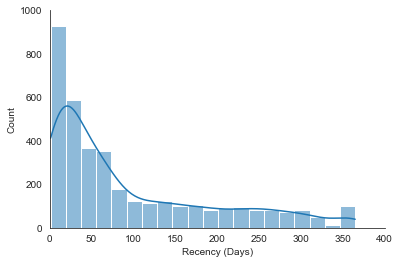

In [72]:
# Look at distributions in histograms
g1=sns.histplot(df2['Recency (Days)'], kde=True, bins=20); 
g1.set_xlim([0,400])
g1.set_ylim([0,1000])
sns.despine()

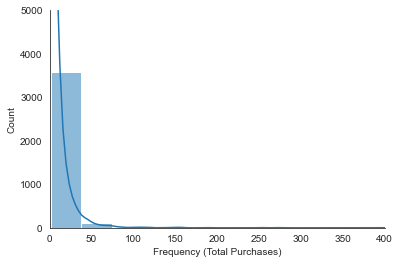

In [73]:
# Look at distributions in histograms
g1=sns.histplot(df2['Frequency (Total Purchases)'], kde=True, bins=20); 
g1.set_xlim([0,400])
g1.set_ylim([0,5000])
sns.despine()

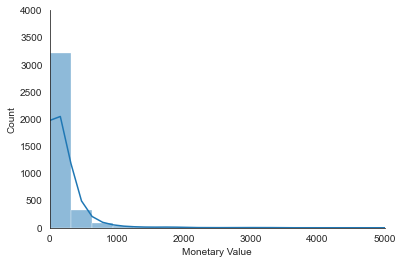

In [74]:
# Look at distributions in histograms
g1=sns.histplot(df2['Monetary Value'], kde=True, bins=100); 
g1.set_xlim([0,5000])
g1.set_ylim([0,4000])
sns.despine()

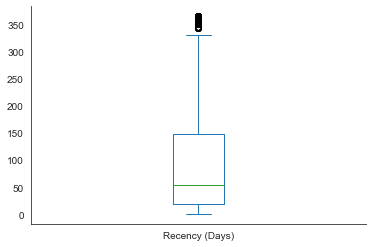

In [75]:
df2['Recency (Days)'].plot.box()
sns.despine()

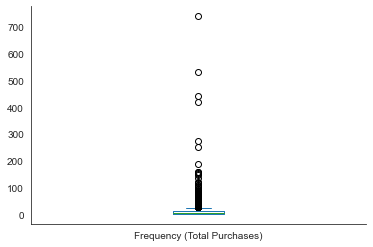

In [76]:
df2['Frequency (Total Purchases)'].plot.box()
sns.despine()

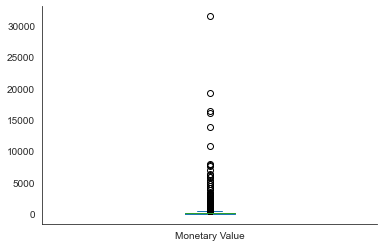

In [77]:
df2['Monetary Value'].plot.box()
sns.despine()

# 6b. Exploratory Data Analysis of 2nd Data Frame: Multivariate 

### a. Look at variables in a pairplot

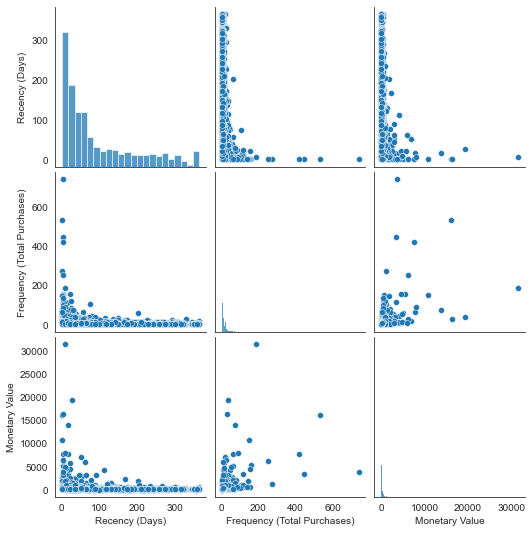

In [78]:
#Do a pairplot
sns.pairplot(df2, palette='Dark2');

### b. Correlations matrix using numeric variables

<AxesSubplot:>

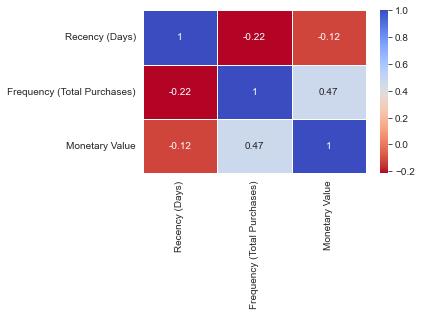

In [79]:
#Look at correlations between variables in a heatmap
plt.figure(figsize=(5,3))
sns.heatmap(df2.corr(), cmap='coolwarm_r', linecolor='white', linewidths=1, annot=True)  

# 7. K-Means Cluster Analysis

### a. Find the Transformation that reduces skewness the most

In [80]:
#Transform the data using log transformation and get the skewness of each variable
sk1a=(np.log(df2['Recency (Days)'])).skew()
sk1b=(np.log(df2['Frequency (Total Purchases)'])).skew()
sk1c=(np.log(df2['Monetary Value'])).skew()
sk1 = [sk1a,sk1b,sk1c]
labels = ['Recency (Days)','Frequency (Total Purchases)', 'Monetary Value']
skewness1 = pd.DataFrame(sk1,labels,['Log Transformation'])
skewness1

#Transform the data using square root transformation and get the skewness of each variable
sk2a=(np.sqrt(df2['Recency (Days)'])).skew()
sk2b=(np.sqrt(df2['Frequency (Total Purchases)'])).skew()
sk2c=(np.sqrt(df2['Monetary Value'])).skew()
sk2 = [sk2a,sk2b,sk2c]
labels = ['Recency (Days)','Frequency (Total Purchases)', 'Monetary Value']
skewness2 = pd.DataFrame(sk2,labels,['Sqrt Transformation'])
skewness2

#Do a box-cox transformation and calculate skewness. Only use if the data is positive.
from scipy import stats
sk3a=pd.Series((stats.boxcox(df2['Recency (Days)']))[0]).skew()
sk3b=pd.Series((stats.boxcox(df2['Frequency (Total Purchases)']))[0]).skew()
sk3c=pd.Series((stats.boxcox(df2['Monetary Value']))[0]).skew()
sk3 = [sk3a,sk3b,sk3c]
labels = ['Recency (Days)','Frequency (Total Purchases)', 'Monetary Value']
skewness3 = pd.DataFrame(sk3,labels,['Box Cox Transformation'])
skewness3

skewness = pd.DataFrame()
skewness ['Log Transformation'] = skewness1
skewness ['Square root Transformation'] =skewness2
skewness ['Box Cox Transformation'] = skewness3
skewness

,Log Transformation,Square root Transformation,Box Cox Transformation
Recency (Days),-0.608452,0.520565,-0.075704
Frequency (Total Purchases),0.325930,3.295070,0.026382
Monetary Value,0.122029,5.502810,-0.007814


In [81]:
#Transform each column with skewed data and put each new column into a new dataframe.
deskew1 = pd.DataFrame()
deskew1['Recency (Days)'] = stats.boxcox(df2['Recency (Days)'])[0]
deskew1['Frequency (Total Purchases)'] = stats.boxcox(df2['Frequency (Total Purchases)'])[0]
deskew1['Monetary Value'] = stats.boxcox(df2['Monetary Value'])[0]
deskew1.head()

,Recency (Days),Frequency (Total Purchases),Monetary Value
0,4.875059,2.147904,5.308985
1,10.510948,0.000000,3.529879
2,2.900731,2.083037,5.819541
3,10.431850,0.000000,2.621694
4,6.386990,1.463223,4.431282


### b. Normalize the data

In [82]:
#Normalize the deskewed data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(deskew1)
normalized1 = scaler.transform(deskew1)
#Convert the normalized data from an array into a dataframe
norm1=pd.DataFrame(normalized1)
norm1.rename(columns = {0: 'Recency',1: 'Frequency',2: 'MonetaryValue'}, inplace=True)
norm1.head()

,Recency,Frequency,MonetaryValue
0,-0.428638,0.796635,1.005175
1,1.573568,-1.616802,-0.510841
2,-1.130038,0.723748,1.440232
3,1.545468,-1.616802,-1.284727
4,0.108491,0.027310,0.257265


### c. Use the Elbow Method to Determine the Number of Clusters

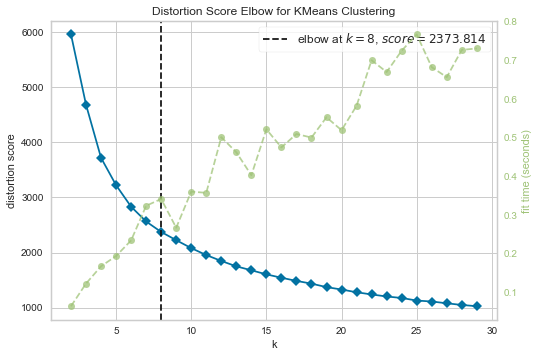

In [83]:
#Select the range of number of clusters to consider for the Elbow Method.
from yellowbrick.cluster import KElbowVisualizer
model1 = KMeans()
visualizer = KElbowVisualizer(model1, k=(2,30), timings= True)
visualizer.fit(norm1) 
visualizer.show();

### d. Fit the model

In [84]:
#Create an instance of the K Means model and fit it to the data using the optimal number of clusters.
model = KMeans(n_clusters=8, random_state=101)
model.fit(norm1)

KMeans(random_state=101)

In [85]:
#See the paramters for our model. 
model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'random_state': 101,
 'tol': 0.0001,
 'verbose': 0}

In [86]:
#See the cluster center vectors
model.cluster_centers_

array([[ 0.60635504,  0.37758876,  0.46084838],
       [ 1.24264195, -0.52982472, -0.37253579],
       [-1.29550864,  1.59576563,  1.58568818],
       [-1.14727719,  0.41545677,  0.16667517],
       [-0.36601571,  1.01402379,  0.97503534],
       [-0.12834754, -0.36671748, -0.3302915 ],
       [-0.58177632, -1.27278706, -1.25180503],
       [ 1.18295008, -1.44729732, -1.45572556]])

### e. Get descriptive results for each customer segment

In [87]:
#Add segment labels in a new column to go with each customer's row in the dataframe
df2['Segment']=model.labels_
df2.head(2)

,Recency (Days),Frequency (Total Purchases),Monetary Value,Segment
CustomerID,,,,
12347,31,12,292.98,4
12348,310,1,40.00,7


In [88]:
#Group the rows by cluster and calculate means for each variable for each cluster. 
#Get a count of how many customers are in each cluster.
#Adding the '.T' to the end transforms the table by turning rows into columns and columns into rows.
SegDes=df2.groupby('Segment').agg({'Recency (Days)':'mean', 'Frequency (Total Purchases)':['mean','count'], 'Monetary Value':['mean', 'sum']}).round(2).T
SegDes

Segment                                   0         1          2         3  \
Recency (Days)              mean     128.87    235.14      10.39     12.56   
Frequency (Total Purchases) mean       8.44      3.20      46.33      8.97   
                            count    522.00    562.00     329.00    544.00   
Monetary Value              mean     178.02     62.32    1252.34    113.83   
                            sum    92928.58  35023.90  412021.08  61923.79   

Segment                                    4         5        6        7  
Recency (Days)              mean       38.54     51.79    31.82   225.78  
Frequency (Total Purchases) mean       17.69      3.70     1.56     1.25  
                            count     480.00    633.00   275.00   379.00  
Monetary Value              mean      343.68     60.20    19.59    15.20  
                            sum    164966.78  38107.35  5388.06  5761.23

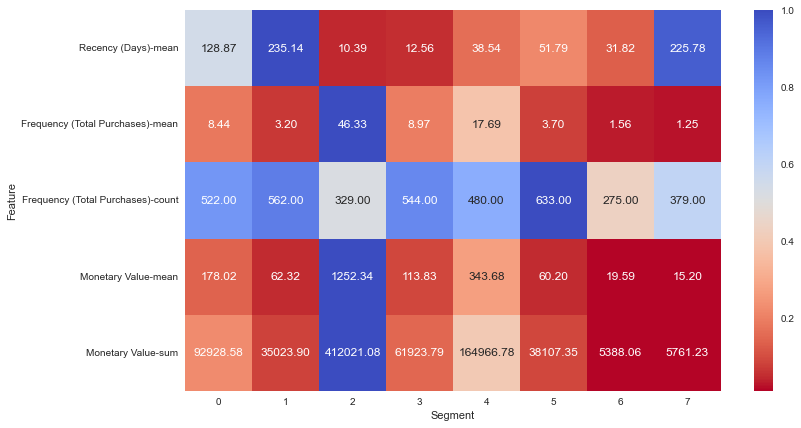

In [89]:
#Make a heatmap of the characteristics of each segment. 
#Normalize numbers and use them to color the heatmap by row but display the segment descriptive numbers.
#Reverse the 'cool warm' colors so big numbers are in blue.
colors1 = SegDes.div(SegDes.max(axis=1), axis=0)
plt.figure(figsize=(12,7))
sns.heatmap(colors1, cmap='coolwarm_r', annot=SegDes, fmt='.2f').set(xlabel='Segment', ylabel='Feature');

In [90]:
#Rename columns with more meaningful segment names
SegDes.columns=['Old Medium Spenders','Old Low Spenders','New High Spenders','New Medium Spenders','Recent Medium Spenders','Recent Low Spenders','Recent Lowest Spenders','Old Lowest Spenders']
SegDes

Old Medium Spenders  Old Low Spenders  \
Recency (Days)              mean                128.87            235.14   
Frequency (Total Purchases) mean                  8.44              3.20   
                            count               522.00            562.00   
Monetary Value              mean                178.02             62.32   
                            sum               92928.58          35023.90   

                                   New High Spenders  New Medium Spenders  \
Recency (Days)              mean               10.39                12.56   
Frequency (Total Purchases) mean               46.33                 8.97   
                            count             329.00               544.00   
Monetary Value              mean             1252.34               113.83   
                            sum            412021.08             61923.79   

                                   Recent Medium Spenders  \
Recency (Days)              mean                    38.54   
Frequency (Total Purchases) mean                    17.69   
                            count                  480.00   
Monetary Value              mean                   343.68   
                            sum                 164966.78   

                                   Recent Low Spenders  \
Recency (Days)              mean                 51.79   
Frequency (Total Purchases) mean                  3.70   
                            count               633.00   
Monetary Value              mean                 60.20   
                            sum               38107.35   

                                   Recent Lowest Spenders  Old Lowest Spenders  
Recency (Days)              mean                    31.82               225.78  
Frequency (Total Purchases) mean                     1.56                 1.25  
                            count                  275.00               379.00  
Monetary Value              mean                    19.59                15.20  
                            sum                   5388.06              5761.23

In [91]:
#Make a table with averages and sum for each segment.
#Reorder the column names by listing them in the order we want
SegDes=SegDes[['Old Lowest Spenders','Old Low Spenders','Old Medium Spenders','Recent Lowest Spenders','Recent Low Spenders','Recent Medium Spenders','New Medium Spenders','New High Spenders']].T
SegDes

Recency (Days) Frequency (Total Purchases)         \
                                 mean                        mean  count   
Old Lowest Spenders            225.78                        1.25  379.0   
Old Low Spenders               235.14                        3.20  562.0   
Old Medium Spenders            128.87                        8.44  522.0   
Recent Lowest Spenders          31.82                        1.56  275.0   
Recent Low Spenders             51.79                        3.70  633.0   
Recent Medium Spenders          38.54                       17.69  480.0   
New Medium Spenders             12.56                        8.97  544.0   
New High Spenders               10.39                       46.33  329.0   

                       Monetary Value             
                                 mean        sum  
Old Lowest Spenders             15.20    5761.23  
Old Low Spenders                62.32   35023.90  
Old Medium Spenders            178.02   92928.58  
Recent Lowest Spenders          19.59    5388.06  
Recent Low Spenders             60.20   38107.35  
Recent Medium Spenders         343.68  164966.78  
New Medium Spenders            113.83   61923.79  
New High Spenders             1252.34  412021.08

In [92]:
#Add segment names to a new column
df2['Segment Name']=df2['Segment'].map({0:'Old Medium Spenders', 1:'Old Low Spenders',2:'New High Spenders',3:'New Medium Spenders',4:'Recent Medium Spenders',5:'Recent Low Spenders',6:'Recent Lowest Spenders',7:'Old Lowest Spenders'})
df2.head(5)

,Recency (Days),Frequency (Total Purchases),Monetary Value,Segment,Segment Name
CustomerID,,,,,
12347,31,12,292.98,4,Recent Medium Spenders
12348,310,1,40.00,7,Old Lowest Spenders
12349,10,11,528.27,2,New High Spenders
12350,302,1,15.00,7,Old Lowest Spenders
12352,64,5,108.40,0,Old Medium Spenders


(0.0, 375.0)

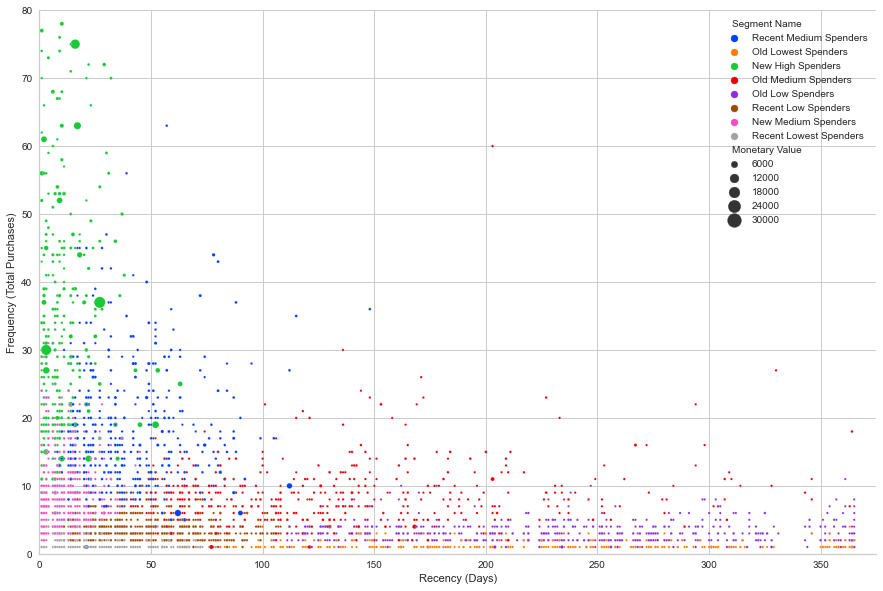

In [93]:
#Compare clusters with a scatterplot, show monetary value in size of dots, and exclude most outliers to zoom in on where most of the data is.
plt.figure(figsize=(15,10))
sns.scatterplot(x='Recency (Days)', y='Frequency (Total Purchases)', size='Monetary Value',sizes=(5, 200),data=df2, hue='Segment Name', palette='bright')
sns.despine()
plt.ylim(0, 80)
plt.xlim(0, 375)

(0.0, 500.0)

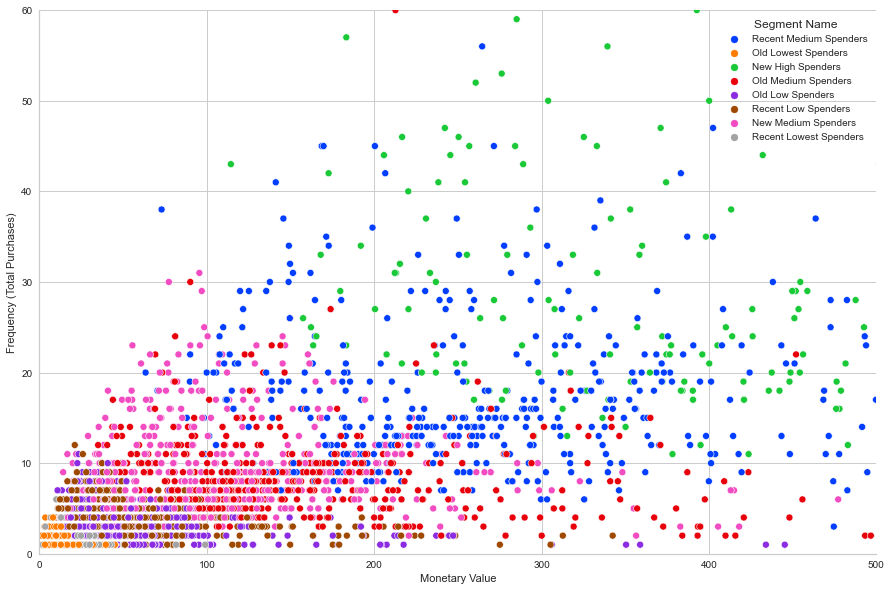

In [94]:
#Compare clusters with a scatterplot. Exclude most outliers to zoom in on where most of the data is.
plt.figure(figsize=(15,10))
sns.scatterplot(x='Monetary Value', y='Frequency (Total Purchases)', data=df2, hue='Segment Name', palette='bright')
sns.despine()
plt.ylim(0, 60)
plt.xlim(0, 500)

(0.0, 2000.0)

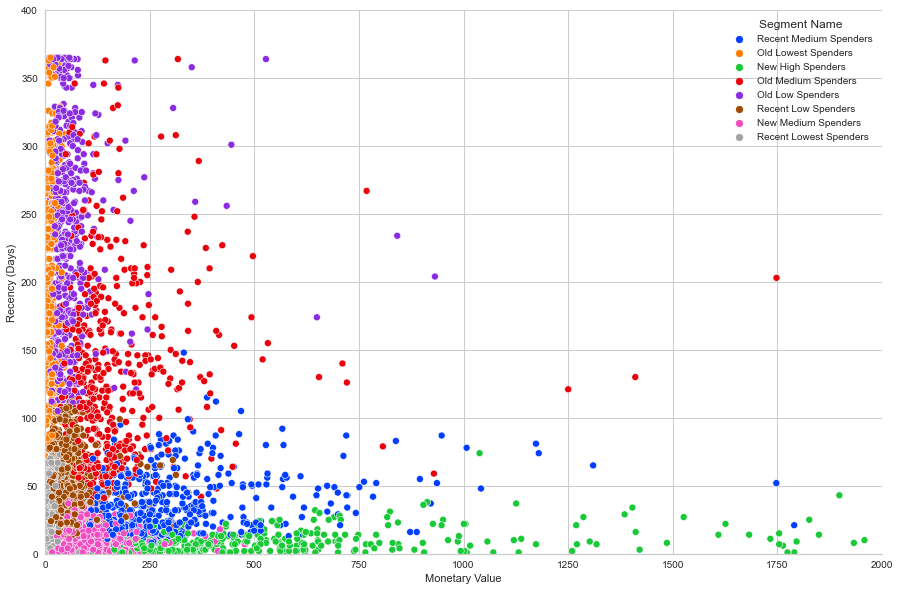

In [95]:
#Compare clusters with a scatterplot. Exclude most outliers to zoom in on where most of the data is.
plt.figure(figsize=(15,10))
sns.scatterplot(x='Monetary Value', y='Recency (Days)', data=df2, hue='Segment Name', palette='bright')
sns.despine()
plt.ylim(0, 400)
plt.xlim(0,2000)

# 8. Interpret Results and Recommend Action 

### a. Answer research questions

In [96]:
#RQ #1: What clusters do we have in the data?
    #K-Means Clustering identified 8 clusters in the data.
#RQ #2: What characteristics does each cluster have?
    #Each cluster can be described using the three variables used to create the clusters. 

### b. Recommend Action

In [97]:
# Based on the data, there are 